<a href="https://colab.research.google.com/github/nagamamo/international_finance/blob/main/10_trilemma_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10　各国通貨制度とトリレンマの定理の実装


10.1　ライブラリの読み込み

　米セントルイス連邦銀行のウェブサイトを利用して為替レート日次データを取得することで、世界36カ国の為替変動ボラティリティを、下記のソースコードにより算出することができます。以下では、19ヵ国・地域の対USドルレートのデータを用いて、通貨制度別の為替変動ボラティリティの算出例を示します。この例では、数値演算のためのpandas、時系列データの期間指定のためのdatetime、図表作成のためのmatplotlibのライブラリをインポートします。

In [2]:
#[1]ライブラリの読み込み
import pandas_datareader as data
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

10.2　為替レート日次データの取得

　続いて、米セントルイス連邦銀行のデータベースから、19カ国・地域の対USドル為替レート日次データを取得します。

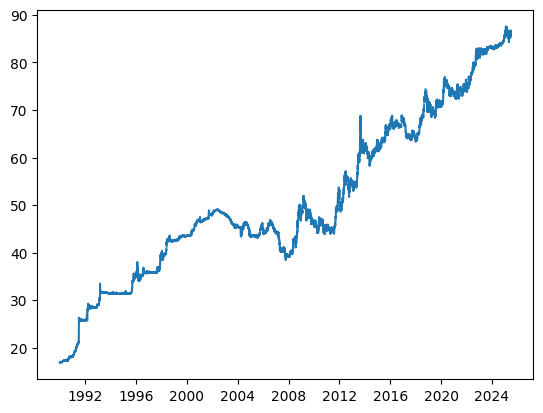

In [3]:
#[2]通貨コードと標本期間の指定
tickers=['DEXJPUS','DEXCAUS','DEXMXUS','DEXBZUS','DEXUSEU','DEXUSUK','DEXSZUS','DEXSDUS','DEXNOUS','DEXDNUS','DEXCHUS','DEXHKUS','DEXKOUS','DEXTAUS','DEXSIUS','DEXMAUS','DEXTHUS','DEXINUS','DEXUSAL','DEXUSNZ','DEXSFUS'] #通貨コードの指定
start=datetime.date(1990,1,1)#標本期間を1973年1月1日から
end=datetime.date(2025,6,30)#2025年6月30日までに指定
data=data.DataReader(tickers,'fred',start=start,end=end)
currency_list=['JPY_USD','CND_USD','MXP_USD','BZR_USD','USD_EUR','USD_GBP','CHF_USD','SWK_USD','NWK_USD','DKK_USD','CNY_USD','HKD_USD','KRW_USD','TWD_USD','SGD_USD','MYR_USD','THB_USD','IND_USD','USD_AUD','USD_NZD','SFR_USD'] #変数名再定義
data.columns = currency_list
plt.plot(data.IND_USD)

10.3　標本期間別のデータセット作成

　標本期間は、日本円、ユーロ、英ポンド等、完全変動相場制下の通貨は1999年1月1日から2025年6月30日です。固定相場制（中国人民元、マレーシアリンギ）等、他の通貨制度は、採用期間が限られていますので、データセットを4種類準備します。その後、リターンを算出し、その標準偏差を年率で算出します。



In [ ]:
#[3]制度期間別の為替変動ボラティリティ算出
df1=data['1999/1/1':'2025/6/30'].pct_change().dropna().std()*(250**0.5)
df2=data['1995/6/1':'2005/5/30'].pct_change().dropna().std()*(250**0.5)
df3=data['1983/1/1':'2025/6/30'].pct_change().dropna().std()*(250**0.5)
df4=data['1998/11/1':'2005/5/31'].pct_change().dropna().std()*(250**0.5)

10.4　変動ボラティリティの算出

　算出結果は下記の通りです。日本円、ユーロ、英ポンド、スイスフランなどの完全変動相場制の対USドルレートに比べ、人民元（固定相場制）、香港ドル（カレンシーボード制）、シンガポールドル（クローリング・バンド制）の変動ボラティリティが小さいことがわかります。変動相場制を採用しているはずの台湾ドル、タイバーツ、インドルピーのボラティリティが小さい理由がなぜなのか？履修者の皆さんで考えてみてください。

In [6]:
#[4]為替変動ボラティリティの算出結果
print('JPY per USD (1999-2025) =  %.4f'% df1['JPY_USD'])
print('CND per USD (1999-2025) =  %.4f'% df1['CND_USD'])
print('MXP per USD (1999-2025) =  %.4f'% df1['MXP_USD'])
print('BZR per USD (1999-2025) =  %.4f'% df1['BZR_USD'])
print('USD per EUR (1999-2025) =  %.4f'% df1['USD_EUR'])
print('USD per GBP (1999-2025) =  %.4f'% df1['USD_GBP'])
print('CHF per USD (1999-2025) =  %.4f'% df1['CHF_USD'])
print('SWK per USD (1999-2025) =  %.4f'% df1['SWK_USD'])
print('NWK per USD (1999-2025) =  %.4f'% df1['NWK_USD'])
print('DKK per USD (1999-2025) =  %.4f'% df1['DKK_USD'])
print('CNY per USD (1995-2005) =  %.4f'% df2['CNY_USD'])
print('HKD per USD (1983-2025) =  %.4f'% df3['HKD_USD'])
print('KRW per USD (1999-2025) =  %.4f'% df1['KRW_USD'])
print('TWD per USD (1999-2025) =  %.4f'% df1['TWD_USD'])
print('SGD per USD (1999-2025) =  %.4f'% df1['SGD_USD'])
print('MYR per USD (1998-2005) =  %.4f'% df4['MYR_USD'])
print('THB per USD (1999-2022) =  %.4f'% df1['THB_USD'])
print('IND per USD (1999-2022) =  %.4f'% df1['IND_USD'])
print('SFR per USD (1999-2022) =  %.4f'% df1['SFR_USD'])

JPY per USD (1999-2025) =  0.0982
CND per USD (1999-2025) =  0.0823
MXP per USD (1999-2025) =  0.1097
BZR per USD (1999-2025) =  0.1641
USD per EUR (1999-2025) =  0.0903
USD per GBP (1999-2025) =  0.0907
CHF per USD (1999-2025) =  0.0995
SWK per USD (1999-2025) =  0.1133
NWK per USD (1999-2025) =  0.1192
DKK per USD (1999-2025) =  0.0917
CNY per USD (1995-2005) =  0.0011
HKD per USD (1983-2025) =  0.0055
KRW per USD (1999-2025) =  0.1006
TWD per USD (1999-2025) =  0.0480
SGD per USD (1999-2025) =  0.0498
MYR per USD (1998-2005) =  0.0002
THB per USD (1999-2022) =  0.0635
IND per USD (1999-2022) =  0.0633
SFR per USD (1999-2022) =  0.1602
